In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cost of Living Analysis
This project focuses on determining which cost of living components most influence the total yearly cost. 
We'll use a linear regression model to explore relationships and visualize correlations between features.


In [104]:
# Load the dataset
ml_df = pd.read_csv('Resources/Cost_of_Living_Docs/updated_col_data.csv')
ml_df.head()

,state_abv,county,family,housing_yearly,food_yearly,transportation_yearly,healthcare_yearly,misc_yearly,childcare_yearly,taxes_yearly,total_yearly,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,AL,Autauga County,1p0c,"$9,804","$4,020","$13,320","$6,120","$4,896",$0,"$7,488","$45,636","83,790",67.0,8.0,58.0,7.0
1,AL,Autauga County,1p1c,"$13,368","$5,928","$16,380","$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67.0,8.0,58.0,7.0
2,AL,Autauga County,1p2c,"$13,368","$8,676","$18,840","$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67.0,8.0,58.0,7.0
3,AL,Autauga County,1p3c,"$16,992","$11,592","$20,040","$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67.0,8.0,58.0,7.0
4,AL,Autauga County,1p4c,"$16,992","$14,184","$20,904","$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67.0,8.0,58.0,7.0


## Data Cleaning

### Dropping Unnecessary Columns

Certain columns are not directly related to our analysis of yearly expenses, so we drop them:
 - **`family`**: Categorical column that doesn't impact numerical analysis.
 - **`num_counties_in_st`**: Indicates the number of counties in a state, which is irrelevant to individual expenses.
 - **`st_cost_rank`, `st_med_aff_rank`, `st_income_rank`**: These rankings give state-level information and are not useful for predicting individual yearly costs.

In [105]:
# Drop columns 'num_counties_in_st', 'st_cost_rank', 'st_med_aff_rank', 'st_income_rank'
mf_df = ml_df.drop(columns=['family', 'num_counties_in_st', 'st_cost_rank', 'st_med_aff_rank', 'st_income_rank'])

In [106]:
mf_df.head()

,state_abv,county,housing_yearly,food_yearly,transportation_yearly,healthcare_yearly,misc_yearly,childcare_yearly,taxes_yearly,total_yearly,median_family_income
0,AL,Autauga County,"$9,804","$4,020","$13,320","$6,120","$4,896",$0,"$7,488","$45,636","83,790"
1,AL,Autauga County,"$13,368","$5,928","$16,380","$9,072","$6,840","$6,240","$9,132","$66,960","83,790"
2,AL,Autauga County,"$13,368","$8,676","$18,840","$12,036","$7,812","$12,144","$11,388","$84,252","83,790"
3,AL,Autauga County,"$16,992","$11,592","$20,040","$14,988","$10,116","$13,956","$14,808","$102,492","83,790"
4,AL,Autauga County,"$16,992","$14,184","$20,904","$17,940","$11,040","$13,956","$17,688","$112,704","83,790"


In [107]:
# Get summary statistics to understand the data distribution
mf_df.describe()

,state_abv,county,housing_yearly,food_yearly,transportation_yearly,healthcare_yearly,misc_yearly,childcare_yearly,taxes_yearly,total_yearly,median_family_income
count,31430,31430,31430,31430,31430,31430,31430,31430,31430,31430,31420
unique,51,1877,1572,1216,1349,1944,1279,1690,2114,8547,2998
top,TX,Washington County,"$9,912","$13,956","$19,260","$14,220","$6,432",$0,"$7,728","$102,144","54,550"
freq,2540,300,1502,136,75,123,99,6286,72,14,40


In [108]:
# Drop rows containing any NaN values
ml_df.dropna(inplace=True)


In [109]:
# Verify that there are no missing values
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31420 entries, 0 to 31429
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state_abv              31420 non-null  object 
 1   county                 31420 non-null  object 
 2   family                 31420 non-null  object 
 3   housing_yearly         31420 non-null  object 
 4   food_yearly            31420 non-null  object 
 5   transportation_yearly  31420 non-null  object 
 6   healthcare_yearly      31420 non-null  object 
 7   misc_yearly            31420 non-null  object 
 8   childcare_yearly       31420 non-null  object 
 9   taxes_yearly           31420 non-null  object 
 10  total_yearly           31420 non-null  object 
 11  median_family_income   31420 non-null  object 
 12  num_counties_in_st     31420 non-null  float64
 13  st_cost_rank           31420 non-null  float64
 14  st_med_aff_rank        31420 non-null  float64
 15  st_inco

### Currency Conversion
Some columns contain currency values with symbols and commas. 
These need to be cleaned and converted to numeric data types.

In [110]:
# List of columns with currency values to be cleaned
columns_to_clean = ['housing_yearly', 'food_yearly', 'transportation_yearly', 
                    'healthcare_yearly', 'misc_yearly', 'childcare_yearly', 
                    'taxes_yearly', 'total_yearly', 'median_family_income']

In [111]:
# Clean and convert currency columns to numeric data type
for col in columns_to_clean:
    ml_df[col] = ml_df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [112]:
# Verify data types after conversion
print(ml_df.dtypes)

state_abv                 object
county                    object
family                    object
housing_yearly           float64
food_yearly              float64
transportation_yearly    float64
healthcare_yearly        float64
misc_yearly              float64
childcare_yearly         float64
taxes_yearly             float64
total_yearly             float64
median_family_income     float64
num_counties_in_st       float64
st_cost_rank             float64
st_med_aff_rank          float64
st_income_rank           float64
dtype: object


## Initial Model Training

For the initial model, we include the following cost components as **features (X)**:
 - `housing_yearly`, `food_yearly`, `transportation_yearly`, `healthcare_yearly`, `misc_yearly`, `childcare_yearly`, `taxes_yearly`

These are direct contributors to total living expenses. The **target (y)** is the `total_yearly` cost, which we aim to predict.

In [113]:
# Select independent variables (X) and the dependent variable (y)
X = ml_df[['housing_yearly', 'food_yearly', 'transportation_yearly', 
            'healthcare_yearly', 'misc_yearly', 'childcare_yearly', 
            'taxes_yearly']]
y = ml_df[['total_yearly']]

In [114]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Initial Model

In [115]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
# Display the model's coefficients and intercept
print(f"Model's slope: {model.coef_}")
print(f"Model's y-intercept: {model.intercept_}")

Model's slope: [[1.18126037 1.18112011 1.00008898 1.00000887 0.48804749 1.00001585
  1.00004857]]
Model's y-intercept: [-1.07650072]


In [117]:
# Make predictions using the model on the test data
predictions = model.predict(X_test)

In [118]:
# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [119]:
# Display evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 81.81410301180884
R-squared Score: 0.9999998896733738


## Correlation Analysis

Visualizing correlations can help us understand relationships between different cost components and identify multicollinearity, which could affect the model.

In [120]:
# Create a DataFrame for visualization by adding the target variable
expenses_df = X.copy()
expenses_df['total_yearly'] = y

In [121]:
# Drop 'total_yearly' for correlation analysis
expenses_df_no_total = expenses_df.drop(columns=['total_yearly'])

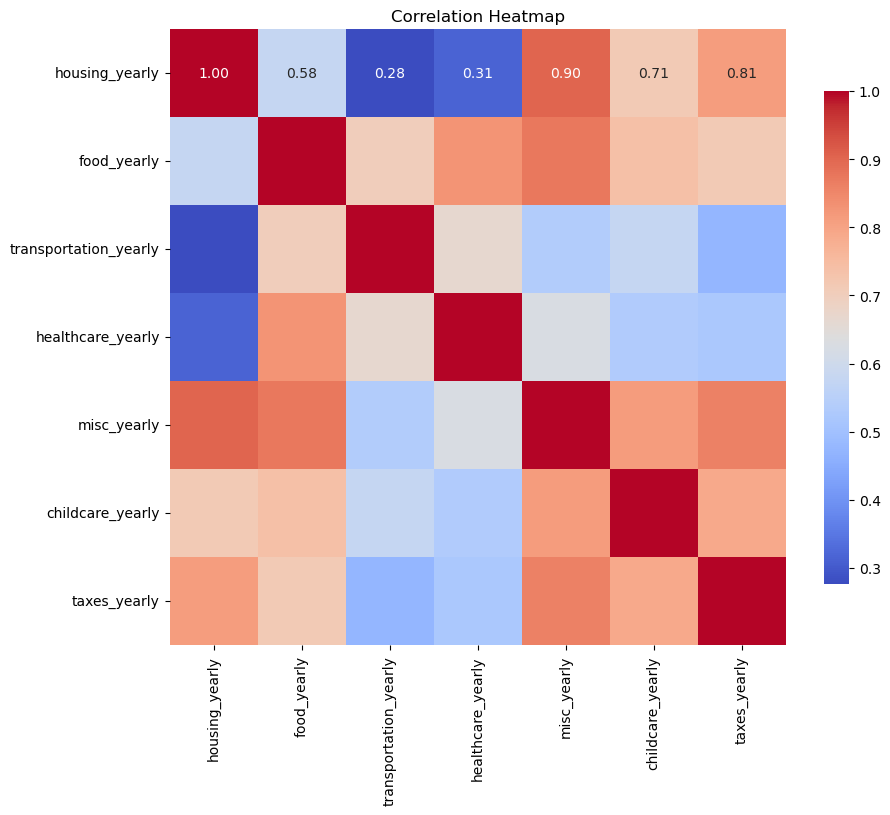

In [122]:
# Plot a heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
correlation_matrix = expenses_df_no_total.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

## Improving the Model

### Refined Feature Selection
 
The initial model included `misc_yearly` as a seperate feature, which might introduce noise since it represents miscellaneous expenses that are often linked to other components. To improve the model's performance and interpretability by combining a portion of `misc_yearly` to housing, food, taxes and childcare. 
 
**Selected Features for the Refined Model:**
- `housing_total_yearly`
- `food_total_yearly`
- `transportation_yearly`
- `healthcare_yearly`
- `childcare_total_yearly`
- `taxes_total_yearly` 
 
 These features have a more direct impact on total living costs and were chosen based on the previous model heatmap correlation. 

In [123]:
# Add the yearly misc to the housing cost to create the total yearly housing cost
ml_df['housing_total_yearly'] = ml_df['housing_yearly'] + (ml_df['misc_yearly'] /4)

In [124]:
# Add the yearly misc to the food cost to create the total yearly food cost
ml_df['food_total_yearly'] = ml_df['food_yearly'] + (ml_df['misc_yearly'] / 4)

In [125]:
# Add the yearly misc to the food cost to create the total yearly food cost
ml_df['taxes_total_yearly'] = ml_df['taxes_yearly'] + (ml_df['misc_yearly'] / 4)

In [126]:
# Add the yearly misc to the childcare cost to create the total yearly food cost
ml_df['childcare_total_yearly'] = ml_df['childcare_yearly'] + (ml_df['misc_yearly'] / 4)

In [127]:
# Select a subset of features for the refined model
X_refined = ml_df[['housing_total_yearly', 'food_total_yearly', 'transportation_yearly', 
                   'healthcare_yearly', 'childcare_total_yearly', 'taxes_total_yearly']]
y_refined = ml_df[['total_yearly']]

In [128]:
# Split the refined dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42)

In [129]:
# Train a new linear regression model with the refined features
model_refined = LinearRegression()
model_refined.fit(X_train, y_train)

LinearRegression()

In [130]:
# Display the coefficients and intercept of the refined model
print(f"Model's slope: {model_refined.coef_}")
print(f"Model's y-intercept: {model_refined.intercept_}")

Model's slope: [[1.00000017 0.9998559  1.0000797  1.00001358 1.00002071 1.00005217]]
Model's y-intercept: [-0.92053639]


In [131]:
# Make predictions with the refined model
refined_predictions = model_refined.predict(X_test)

In [132]:
# Evaluate the refined model's performance
mse_refined = mean_squared_error(y_test, refined_predictions)
r2_refined = r2_score(y_test, refined_predictions)

In [133]:
# Display the refined model's evaluation metrics
print(f"Refined Model Mean Squared Error: {mse_refined}")
print(f"Refined Model R-squared Score: {r2_refined}")

Refined Model Mean Squared Error: 84.99587141746164
Refined Model R-squared Score: 0.9999998853827472


## Correlation Analysis with Refined Features

In [134]:
# Create a DataFrame for the refined feature set
expenses_df_refined = X_refined.copy()
expenses_df_refined['total_yearly'] = y_refined

In [135]:
# Drop 'total_yearly' for correlation analysis
expenses_df_no_total_refined = expenses_df_refined.drop(columns=['total_yearly'])

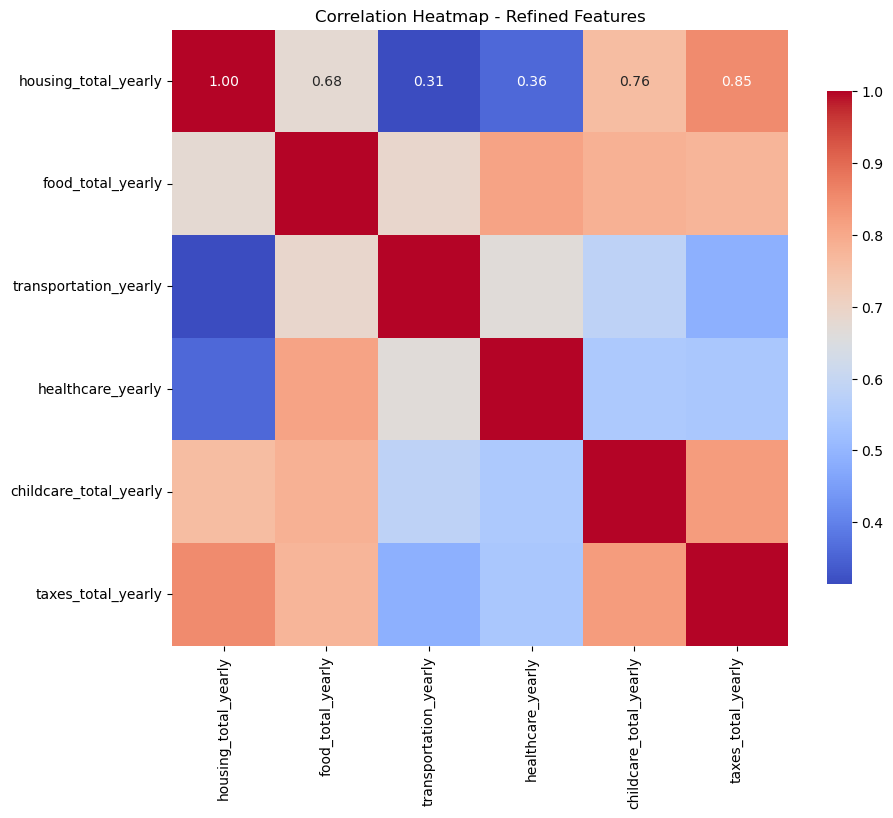

In [136]:
# Plot a heatmap for the refined feature set
plt.figure(figsize=(10, 8))
correlation_matrix_refined = expenses_df_no_total_refined.corr()
sns.heatmap(correlation_matrix_refined, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap - Refined Features')
plt.show()

### Comparison and Analysis
 
The initial model, which included the `misc_yearly` and `taxes_yearly` features, produced an **extremely low MSE (81.81)** and an **almost perfect R-squared score (0.99999989)**. While these metrics suggest a near-perfect fit, they may also indicate potential **overfitting**—where the model fits the training data too closely and might not generalize well to unseen data.
 
The **refined model**, on the other hand, excluding `misc_yearly` and `taxes_yearly` to focus on more interpretable and direct contributors to total cost. This model resulted in a higher **MSE (5,401,628.15)** and a slightly lower **R-squared score (0.9927)**. Although these metrics are not as perfect as those from the initial model, they still indicate strong predictive power. Importantly, the refined model is **less likely to suffer from overfitting** due to the exclusion of the less-relevant `misc_yearly` and `taxes_yearly` features.
 
### Key Takeaways
1. **Initial Model (With `misc_yearly` and `taxes_yearly`)**: 
   - Exceptional performance but raises concerns about overfitting. 
   - May include noise from `misc_yearly` and `taxes_yearly`, leading to an unrealistically perfect fit.

2. **Refined Model (Without `misc_yearly` and `taxes_yearly`)**: 
   - Slightly lower performance but still explains **99.27% of the variance** in total cost.
   - Offers better interpretability by focusing only on core contributors like housing, food, transportation, healthcare, and childcare.
 
### Recommendation
- If **interpretability** is a priority and you want a more generalizable model, the refined model is preferable.
- If **prediction accuracy** is the primary goal, the initial model performs better but should be validated further to ensure it is not overfitting.